### Package and Data Imports

In [1]:
#Importing packages
import math #Various math
import numpy as np #Linear algebra
import scipy #Optimization
import scipy.optimize as sco #Portfolio optimization
from pandas_datareader import data #Package for pulling data from the web
import matplotlib.pyplot as plt #Basic plotting package
import matplotlib.patches as mpatches #Colorscale help
import seaborn as sns #Enhanced plots
sns.set_style('darkgrid') #Plot styling
import pandas as pd #Dataframes
import statistics #Stats
from datetime import date #System clock

#Defining the equities we're interested in 
tickers = ['SQ','MELI','ZG','SE']

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
equity_data = data.DataReader(tickers, 
                       start='2017-1-1', #selecting the starting date (18 months)
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Checking the 20 most recent values
equity_data.tail(10)

Symbols,SQ,MELI,ZG,SE
Date,,,,
2020-09-08,139.110001,1022.530029,80.489998,138.000000
2020-09-09,144.210007,1057.339966,82.269997,142.029999
2020-09-10,141.070007,1040.989990,82.540001,139.500000
2020-09-11,137.449997,1032.979980,85.239998,139.509995
2020-09-14,144.399994,1036.770020,87.050003,147.820007
2020-09-15,154.500000,1029.989990,91.000000,149.990005
2020-09-16,151.050003,1003.000000,94.699997,147.580002
2020-09-17,145.639999,980.150024,95.970001,149.080002
2020-09-18,145.009995,998.059998,95.309998,147.550003


### Comparing Equity Performance

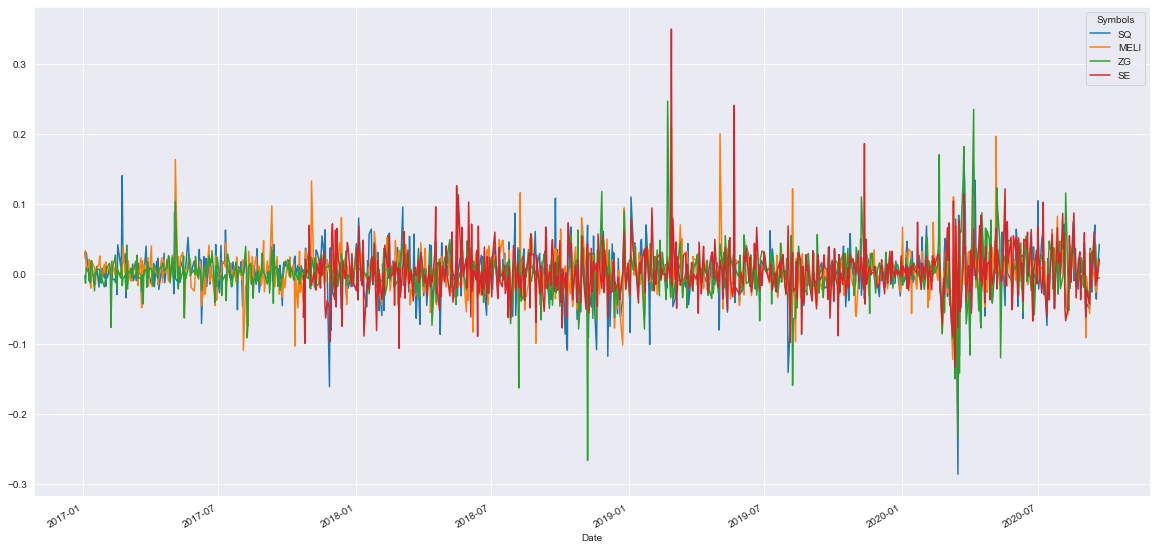

In [2]:
#Taking a glance at the chart for our currency conversion rates in question (PERCENT CHANGE)
data_pct_change = equity_data.pct_change() #calculating the percent change of the equity over the period
data_pct_change.plot(grid=True, figsize=(20, 10));

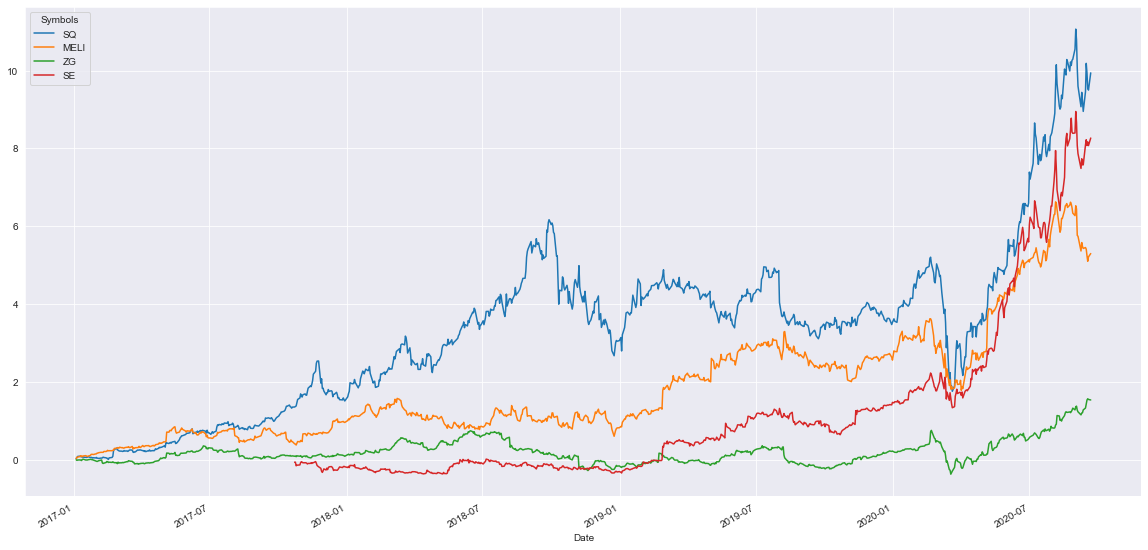

In [3]:
#Taking a look at cumulative returns
cumulative_returns = ((1 + data_pct_change).cumprod() - 1) #calculating the cumulative returns of the equity over the period
cumulative_returns.plot(figsize = (20,10))

### 30/90d Rolling Averages

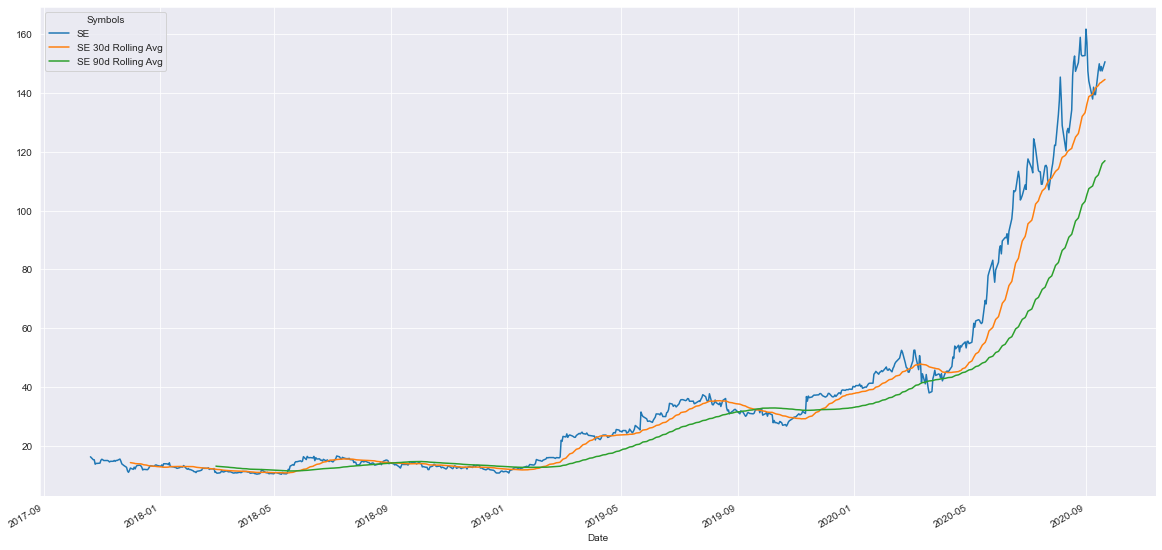

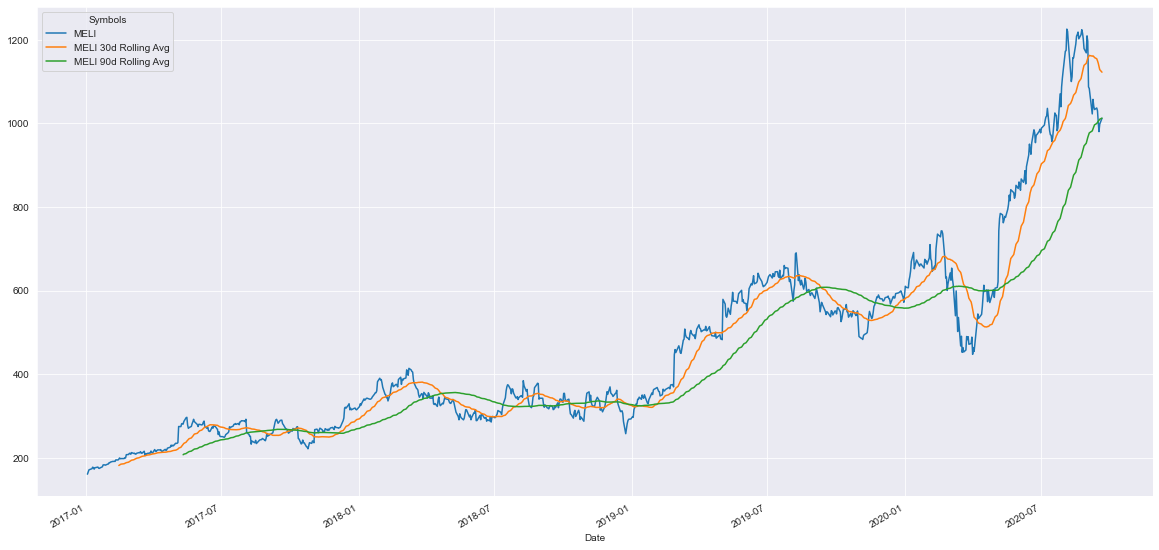

In [4]:
#Calculating 30 & 90 day rolling averages 

#SE
equity_data['SE 30d Rolling Avg'] = np.round(equity_data['SE'].rolling(window=30).mean(), 5) #30d rolling avg
equity_data['SE 90d Rolling Avg'] = np.round(equity_data['SE'].rolling(window=90).mean(), 5) #90d rolling avg
equity_data[['SE', 'SE 30d Rolling Avg', 'SE 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

#MELI
equity_data['MELI 30d Rolling Avg'] = np.round(equity_data['MELI'].rolling(window=30).mean(), 5) #30d rolling avg
equity_data['MELI 90d Rolling Avg'] = np.round(equity_data['MELI'].rolling(window=90).mean(), 5) #90d rolling avg
equity_data[['MELI', 'MELI 30d Rolling Avg', 'MELI 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

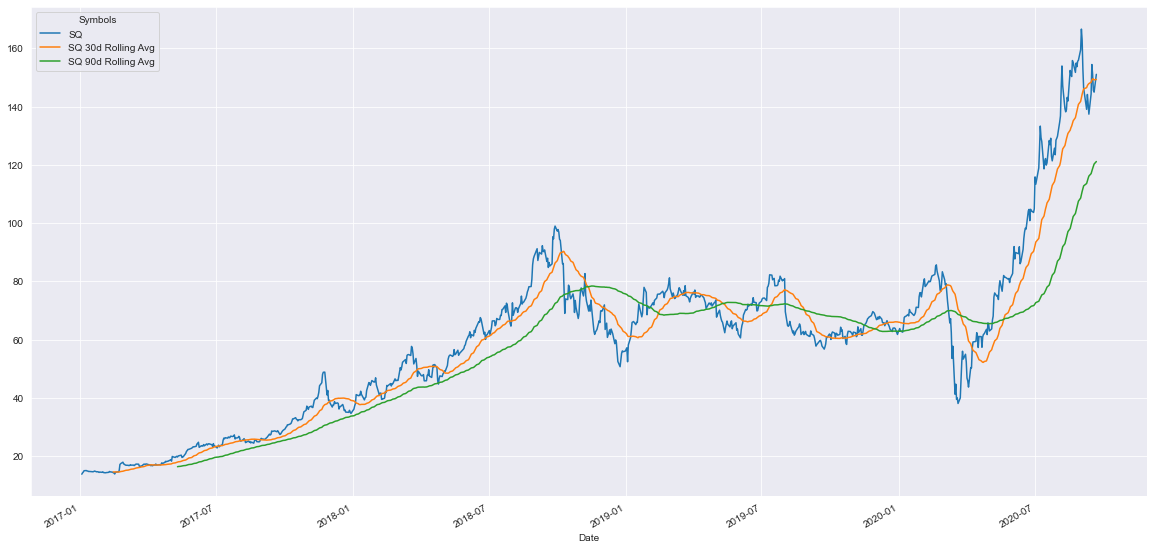

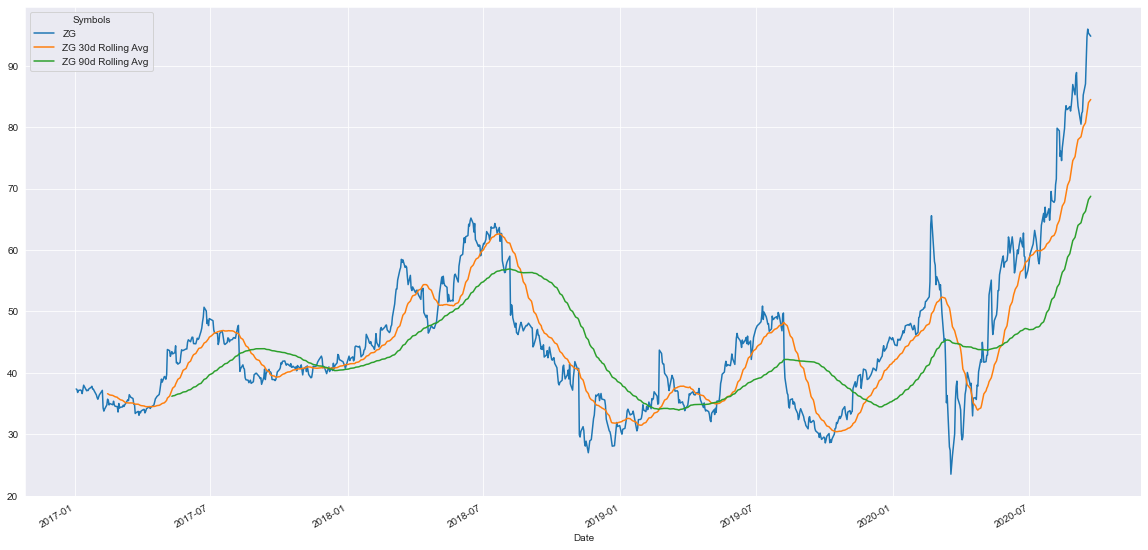

In [5]:
#Calculating 30 & 90 day rolling averages 

#SQ
equity_data['SQ 30d Rolling Avg'] = np.round(equity_data['SQ'].rolling(window=30).mean(), 5) #30d rolling avg
equity_data['SQ 90d Rolling Avg'] = np.round(equity_data['SQ'].rolling(window=90).mean(), 5) #90d rolling avg
equity_data[['SQ', 'SQ 30d Rolling Avg', 'SQ 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

#ZQ
equity_data['ZG 30d Rolling Avg'] = np.round(equity_data['ZG'].rolling(window=30).mean(), 5) #30d rolling avg
equity_data['ZG 90d Rolling Avg'] = np.round(equity_data['ZG'].rolling(window=90).mean(), 5) #90d rolling avg
equity_data[['ZG', 'ZG 30d Rolling Avg', 'ZG 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

### 30/90d Rolling Averages [Cumulative Returns]

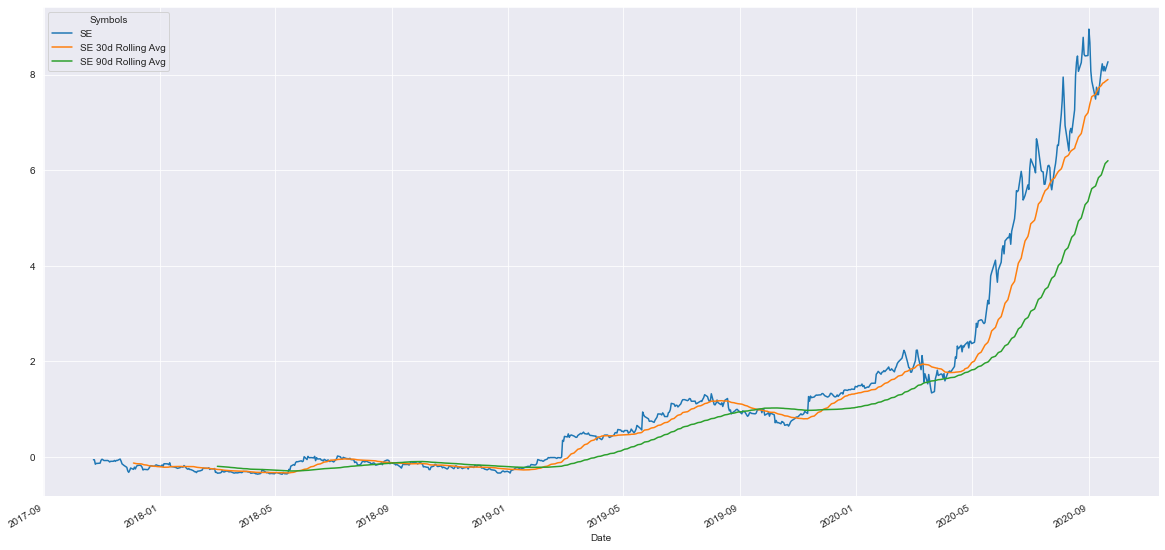

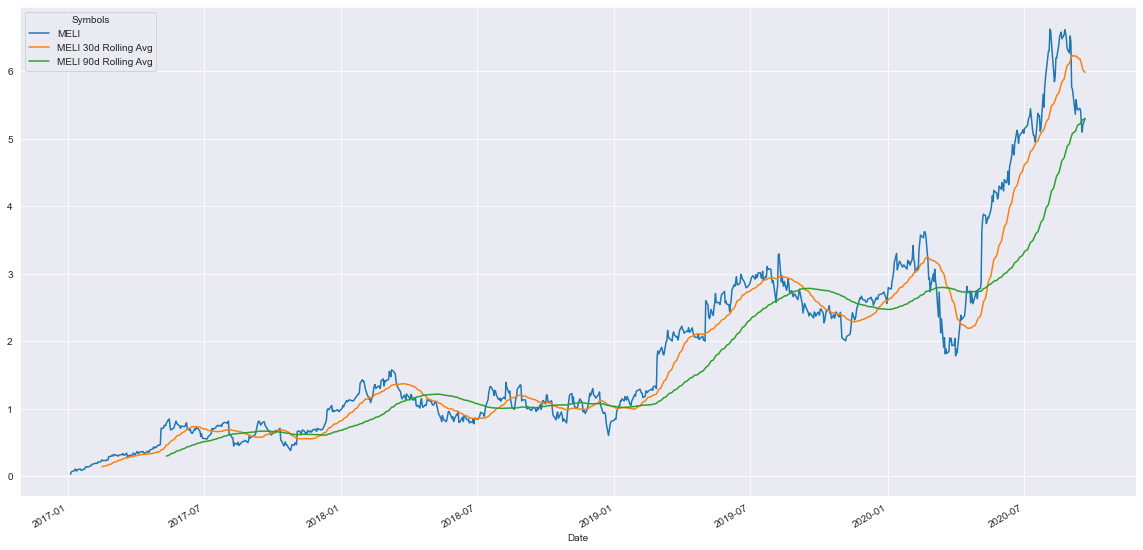

In [6]:
#Calculating 30 & 90 day rolling averages for cumulative returns

#SE
cumulative_returns['SE 30d Rolling Avg'] = np.round(cumulative_returns['SE'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['SE 90d Rolling Avg'] = np.round(cumulative_returns['SE'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['SE', 'SE 30d Rolling Avg', 'SE 90d Rolling Avg']].plot(figsize=(20,10)) 

#MELI
cumulative_returns['MELI 30d Rolling Avg'] = np.round(cumulative_returns['MELI'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['MELI 90d Rolling Avg'] = np.round(cumulative_returns['MELI'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['MELI', 'MELI 30d Rolling Avg', 'MELI 90d Rolling Avg']].plot(figsize=(20,10)) 

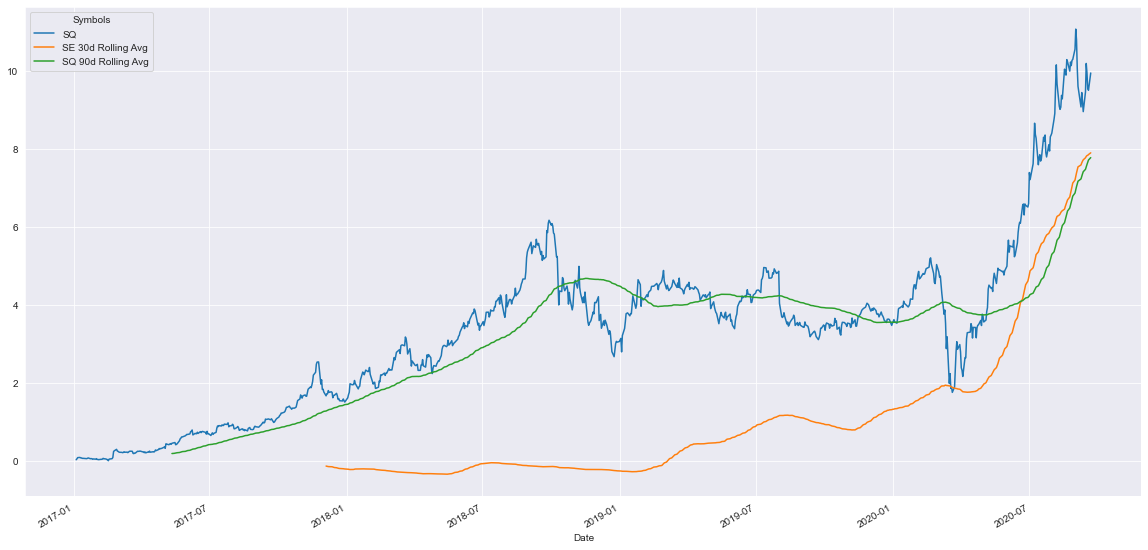

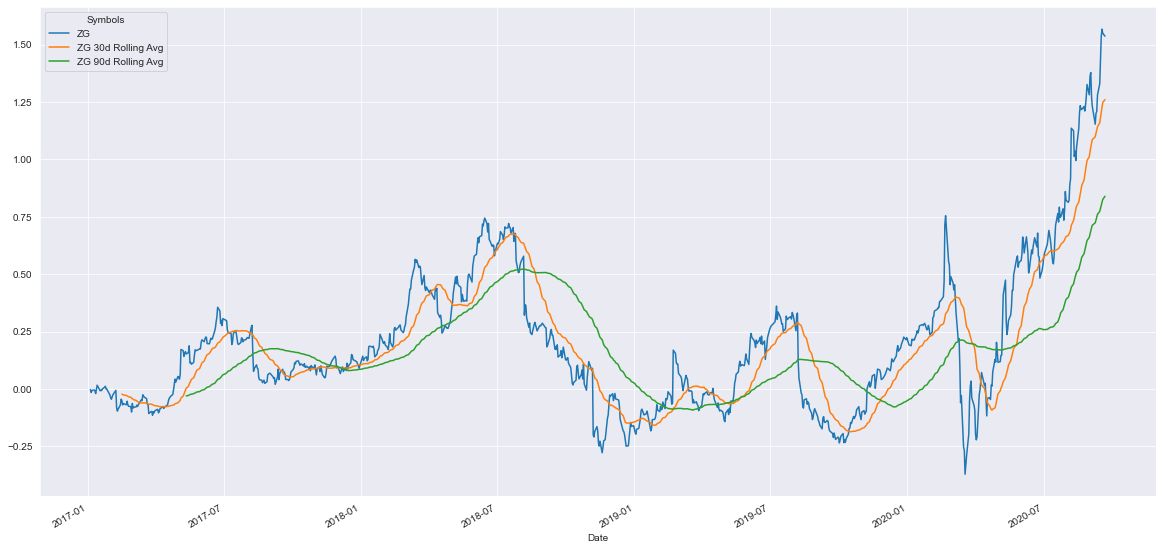

In [7]:
#Calculating 30 & 90 day rolling averages for cumulative returns

#SQ
cumulative_returns['SQ 30d Rolling Avg'] = np.round(cumulative_returns['SQ'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['SQ 90d Rolling Avg'] = np.round(cumulative_returns['SQ'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['SQ', 'SE 30d Rolling Avg', 'SQ 90d Rolling Avg']].plot(figsize=(20,10)) 

#ZG
cumulative_returns['ZG 30d Rolling Avg'] = np.round(cumulative_returns['ZG'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['ZG 90d Rolling Avg'] = np.round(cumulative_returns['ZG'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['ZG', 'ZG 30d Rolling Avg', 'ZG 90d Rolling Avg']].plot(figsize=(20,10)) 

### Determining the Overall Return & Volatility of Each Equity

In [8]:
#SE

#Return
equity_data['SE Return'] = np.log(equity_data['SE']/equity_data['SE'].shift(1))
#30d moving volatility 
equity_data['SE Mov_Volatility'] = equity_data['SE Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#MELI

#Return
equity_data['MELI Return'] = np.log(equity_data['MELI']/equity_data['MELI'].shift(1))
#30d moving volatility 
equity_data['MELI Mov_Volatility'] = equity_data['MELI Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#SQ

#Return
equity_data['SQ Return'] = np.log(equity_data['SQ']/equity_data['SQ'].shift(1))
#30d moving volatility 
equity_data['SQ Mov_Volatility'] = equity_data['SQ Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#ZG

#Return
equity_data['ZG Return'] = np.log(equity_data['ZG']/equity_data['ZG'].shift(1))
#30d moving volatility 
equity_data['ZG Mov_Volatility'] = equity_data['ZG Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

### Visualizing Trends

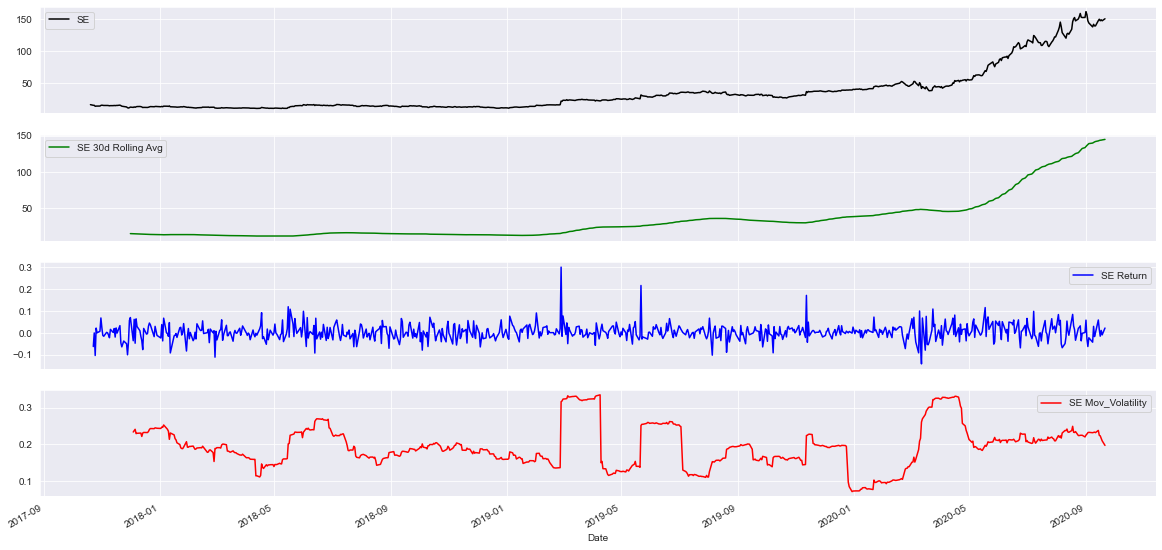

In [9]:
#Visualizing the results

#SE
equity_data[['SE','SE 30d Rolling Avg','SE Return','SE Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

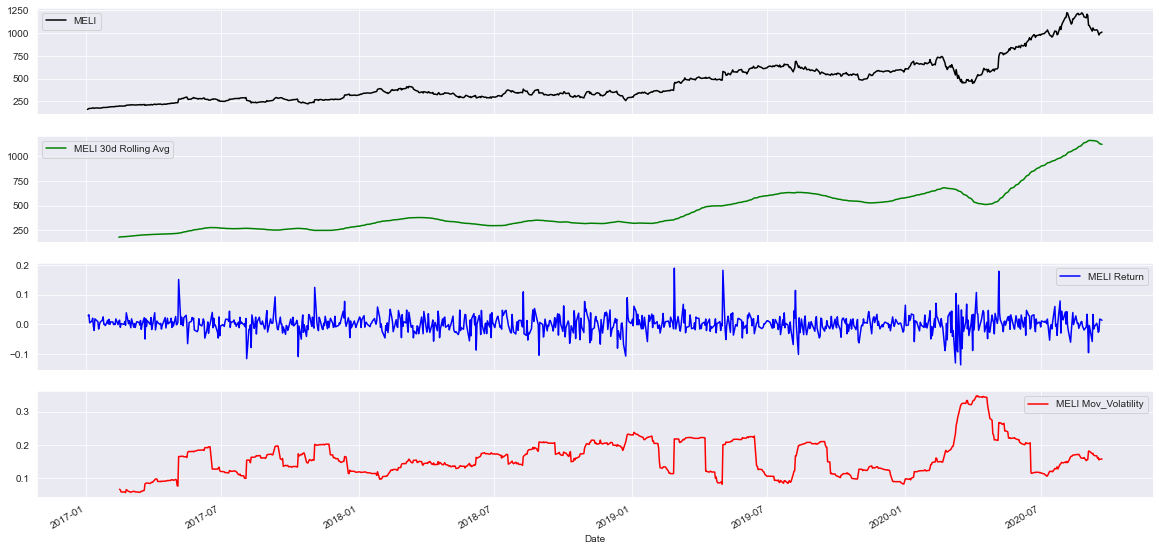

In [10]:
#MELI
equity_data[['MELI','MELI 30d Rolling Avg','MELI Return','MELI Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

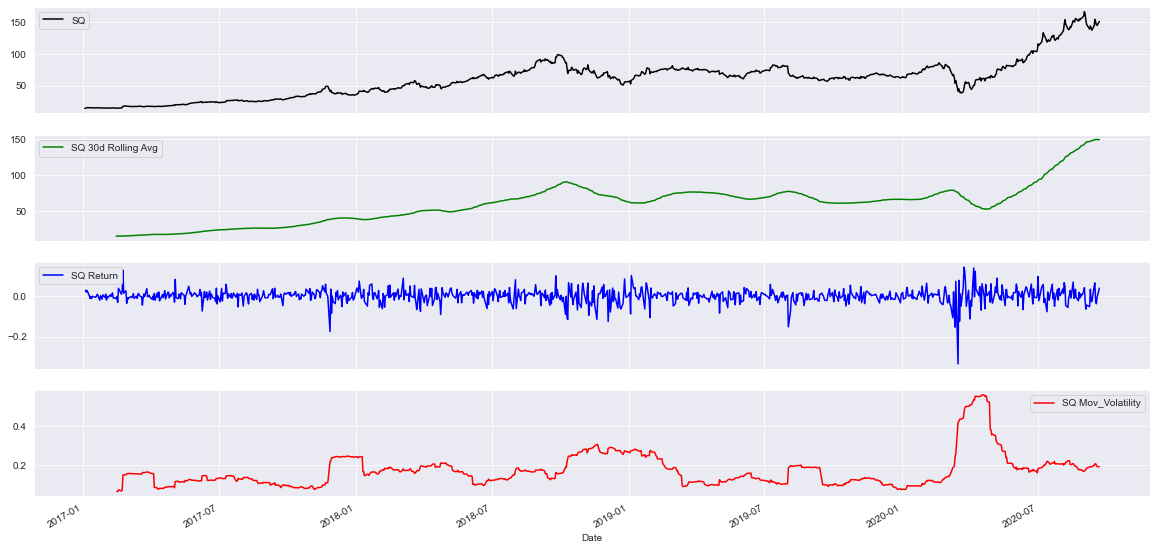

In [11]:
#SQ
equity_data[['SQ','SQ 30d Rolling Avg','SQ Return','SQ Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

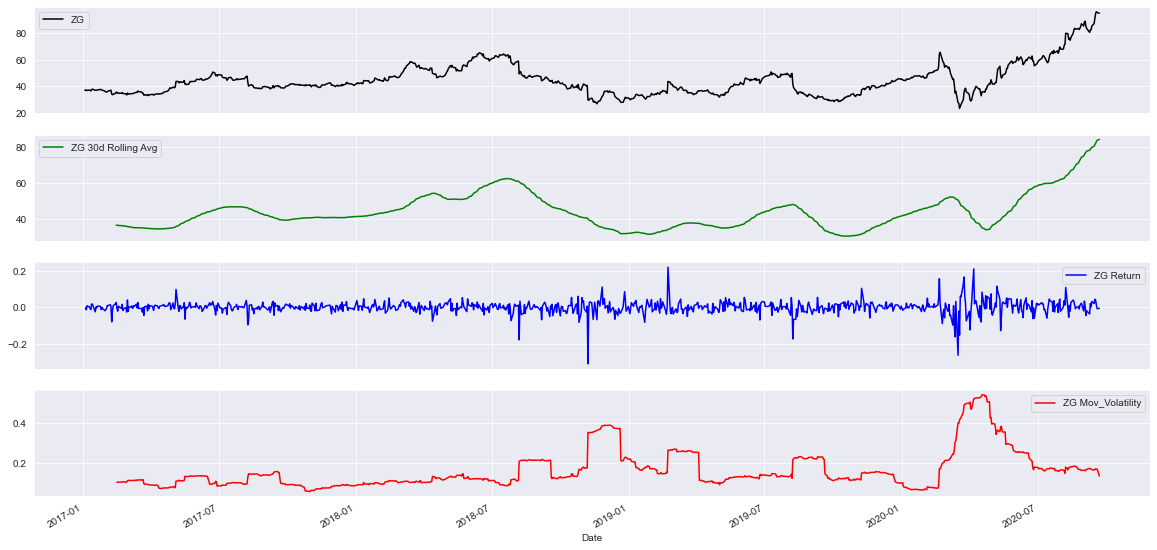

In [12]:
#ZG
equity_data[['ZG','ZG 30d Rolling Avg','ZG Return','ZG Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

### Optimizing Portfolio Weights

In [13]:
#Defining the equities we're interested in 
tickers = ['SQ','MELI','ZG','SE']

#Defining the size of the portfolio (# of equities)
size_portfolio = len(tickers)

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
portfolio_data = data.DataReader(tickers, 
                       start='2017-1-1', #selecting the starting date (36 months)
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Calculating returns
returns = np.log(portfolio_data/portfolio_data.shift(1))

#Calculating average return over a year's worth of trading days
returns.mean()*253

#Calculating covariance over a years's worth of trading days
returns.cov()*253

Symbols,SQ,MELI,ZG,SE
Symbols,,,,
SQ,0.309441,0.120881,0.134433,0.129393
MELI,0.120881,0.238138,0.087399,0.123839
ZG,0.134433,0.087399,0.299215,0.081852
SE,0.129393,0.123839,0.081852,0.347114


### Calculating Expected Return, Var & Vol for ARKF Portfolio Weights

In [14]:
#Holdings as of 9/21/2020

#SQUARE [SQ]: $67.9MM
#MERCADOLIBRE [MELI]: $25.2MM
#ZILLOW [ZG]: $23.9MM
#SEA [SE]: $23.3MM

#Calculating weights
portfolio_size = 67.9+25.2+23.9+23.3
weights = [67.9/portfolio_size,25.2/portfolio_size,23.9/portfolio_size,23.3/portfolio_size]
weights = weights/np.sum(weights)

In [15]:
#Calculating expected portfolio return for ARKFs positions
np.sum(returns.mean()*weights)*253

0.5733151766118637

In [16]:
#Calculating expected portfolio variance for ARKFs positions

#Taking the dot product of the transpose weights array and the portfolio returns matrix
np.dot(weights.T, np.dot(returns.cov() * 253, weights))

0.1797651953427743

In [17]:
#Calculating expected portfolio volatility for ARKFs positions
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 253, weights)))

0.4239872584674854

### Calculating Expected Return, Var & Vol for Fifty Thousand [50000] Potential Portfolio Weights Via Monte Carlo

In [18]:
#Creating empty arrays to store our values
pred_returns = [] 
pred_volatility = []

#Defining a for loop to perform the calculations we did above but this time we'll do it 5000 times
#Calculations and code are the exact same as above just now a for loop performs them for us over and over again
#Every iteration np.random will produce a new randomly weighted portfolio for us to try
for i in range (50000):
    weights = np.random.random(size_portfolio)
    weights /= np.sum(weights)
    pred_returns.append(np.sum(returns.mean() * weights) * 253)
    pred_volatility.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 253, weights))))

#Appending our results to the arrays we created above
pred_returns = np.array(pred_returns)
pred_volatility = np.array(pred_volatility)

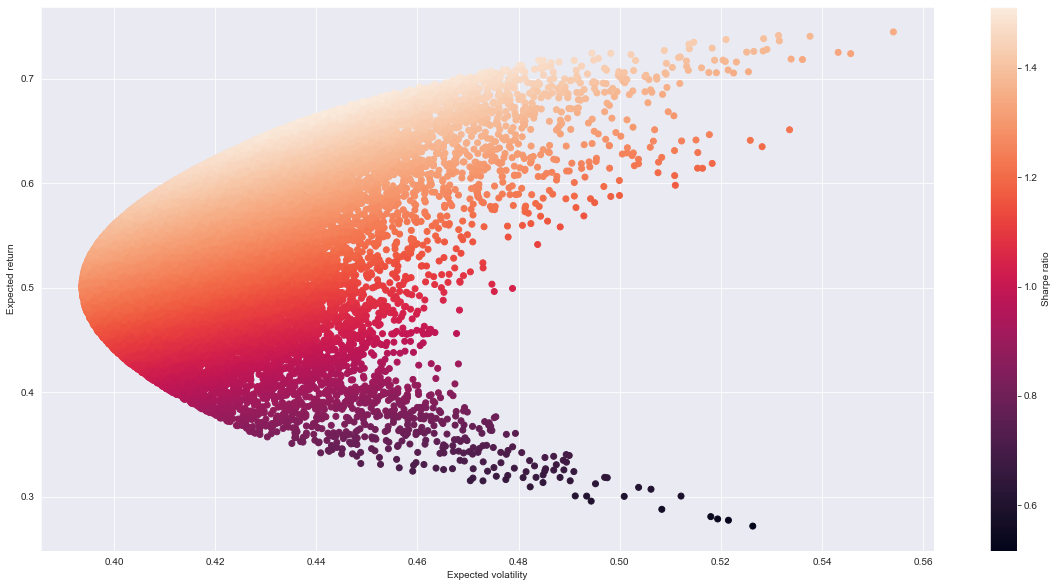

In [19]:
#Visualizing our results
plt.figure(figsize=(20, 10))
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');

### Optimizing Cash Weightings Mathematically

In [20]:
#This function takes in an array of portfolio weights as an input and returns an array of the predicted returns, voltatility
#and Sharpe ratios (automating the same calculations done above)
def stats(weights):
    weights = np.array(weights)
    pred_returns = np.sum(returns.mean() * weights) * 253
    pred_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 253, weights)))
    return np.array([pred_returns,pred_volatility,pred_returns / pred_volatility])

In [21]:
#Creating a function to minimize the Sharpe ratio
def min_sharpe_func(weights):
    return -stats(weights)[2]

#Creating a list of constraints for the optimization 
constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

#Creating a list of bounds for the optimiation
bounds = tuple((0, 1) for x in range(size_portfolio))

#Scaling our portfolio weights and creating a nice array
scaled = size_portfolio * [1./ size_portfolio,]

#Running the optimization function for Sharpe ratio
opts_Sharpe = sco.minimize(min_sharpe_func, scaled, method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [22]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL PORTFOLIO WEIGHTS FOR SHARPE RATIO [SQ, MELI, ZG, SE]')
print((opts_Sharpe['x']).round(3))

#Extracting pred returns, volatility & Sharpe ratio using our stats() function
print('PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_Sharpe['x'].round(3)))

OPTIMAL PORTFOLIO WEIGHTS FOR SHARPE RATIO [SQ, MELI, ZG, SE]
[0.347 0.205 0.    0.448]
PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[0.67104795 0.44396928 1.51147385]


In [23]:
#Repeating for variance
def min_variance_func(weights):
    return stats(weights)[1]**2

#Optimizing using same contraints and bounds as before
opts_variance = sco.minimize(min_variance_func, size_portfolio * [1. / size_portfolio,], method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [24]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL PORTFOLIO WEIGHTS FOR OPTIMAL VARIANCE [SQ, MELI, ZG, SE]')
print((opts_variance['x']).round(3))

#Extracting pred returns, volatility & Sharpe ratio using our created stats() function
print('PREDICTED OUTCOMES FOR OPTIMAL VARIANCE PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_variance['x'].round(3)))

OPTIMAL PORTFOLIO WEIGHTS FOR OPTIMAL VARIANCE [SQ, MELI, ZG, SE]
[0.151 0.368 0.291 0.19 ]
PREDICTED OUTCOMES FOR OPTIMAL VARIANCE PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[0.50033628 0.39361714 1.27112422]


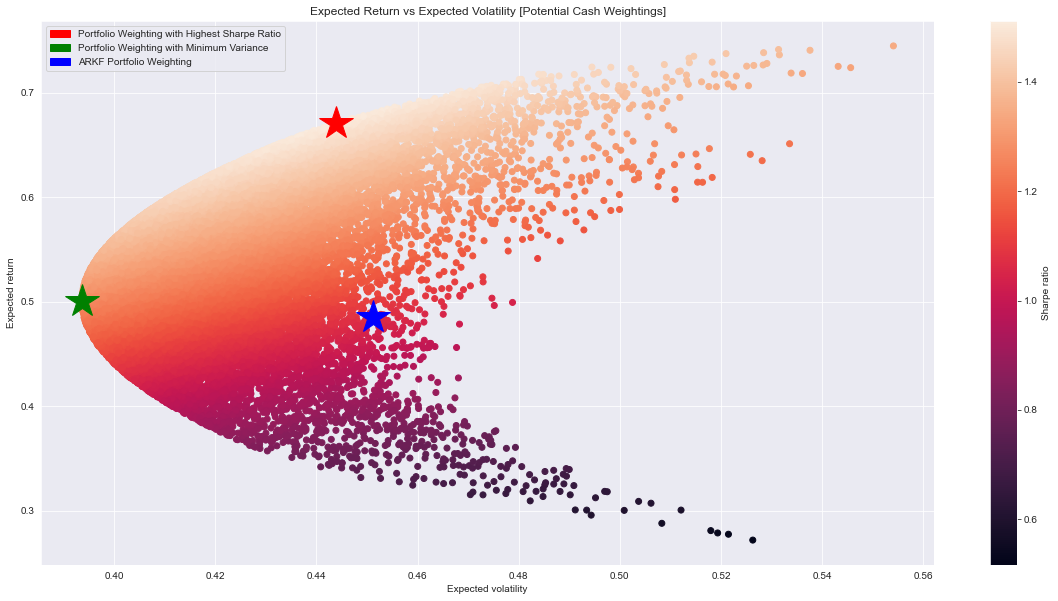

In [30]:
#Visualizing our results
plt.figure(figsize=(20, 10))

#Plotting potential random portfolio compositions
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')

#Plotting porftolio with highest Sharpe ratio (Blue)
plt.plot(stats(opts_Sharpe['x'])[1], stats(opts_Sharpe['x'])[0],
         'r*', markersize=35.0)

#Plotting minimum variance portfolio (Green)
plt.plot(stats(opts_variance['x'])[1], stats(opts_variance['x'])[0],
         'g*', markersize=35.0)

#Plotting ARKF's portfolio (Red)
plt.plot(stats(weights)[1], stats(weights)[0],
         'b*', markersize=35.0)

#Creating legend
import matplotlib.patches as mpatches
red = mpatches.Patch(color='r', label='Portfolio Weighting with Highest Sharpe Ratio')
green = mpatches.Patch(color='g', label='Portfolio Weighting with Minimum Variance')
blue = mpatches.Patch(color='b', label='ARKF Portfolio Weighting')
plt.legend(handles=[red,green,blue])

#Creating labels
plt.title('Expected Return vs Expected Volatility [Potential Cash Weightings]')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');

In [36]:
#Comparing Sharpe Ratios & Volatilites

#ARKF Portfolio
print("ARKF PORTFOLIO: [65% SQ, 5% MELI, 15% ZG, 15% SE]")
print("EXPECTED VOLTAILITY:",stats(weights)[1].round(3))
print("EXPECTED RETURN", stats(weights)[0].round(3))
print("EXPECTED SHARPE RATIO", stats(weights).round(3)[2])
print("")

#Optimal Sharpe ratio portfolio
print("OPTIMAL SHARPE PORTFOLIO: [35% SQ, 20% MELI, 0% ZG, 45% SE]")
print("EXPECTED VOLTAILITY:",opts_Sharpe['x'][1].round(3))
print("EXPECTED RETURN", opts_Sharpe['x'][0].round(3))
print("EXPECTED SHARPE RATIO", stats(opts_Sharpe['x']).round(3)[2])
print("")

#Minimum variance portfolio
print("MINIMUM VARIANCE PORTFOLIO: [15% SQ, 37% MELI, 29% ZG, 19% SE]")
print("EXPECTED VOLTAILITY:",opts_variance['x'][1].round(3))
print("EXPECTED RETURN", opts_variance['x'][0].round(3))
print("EXPECTED SHARPE RATIO", stats(opts_variance['x']).round(3)[2])
print("")

ARKF PORTFOLIO: [65% SQ, 5% MELI, 15% ZG, 15% SE]
EXPECTED VOLTAILITY: 0.451
EXPECTED RETURN 0.485
EXPECTED SHARPE RATIO 1.076

OPTIMAL SHARPE PORTFOLIO: [35% SQ, 20% MELI, 0% ZG, 45% SE]
EXPECTED VOLTAILITY: 0.205
EXPECTED RETURN 0.347
EXPECTED SHARPE RATIO 1.511

MINIMUM VARIANCE PORTFOLIO: [15% SQ, 37% MELI, 29% ZG, 19% SE]
EXPECTED VOLTAILITY: 0.368
EXPECTED RETURN 0.151
EXPECTED SHARPE RATIO 1.272

